In [2]:
from ekpy import analysis
import numpy as np
import scipy.integrate as it
from scipy.signal import find_peaks, savgol_filter, peak_widths
import matplotlib.pyplot as plt
from ekpy.analysis.analysisgeotemp import use_analysis_file #note need to make this under __all__

In [25]:
# load the dataset
Data_folder_path = r"C:\Users\geofr\Desktop\Research\Data\FE\PUND\Python"

dset = analysis.load_Dataset(Data_folder_path + '/BTO')

# print dset, parsable collection of meta data which holds pointers to the real data files
dset

,pulse_width,pulse_delay,voltage_max,num_points,step_size,capacitor_area,thickness,permittivity,format,type,points,count,x_increment,x_origin,x_reference,y_increment,y_origin,y_reference,trial,filename
0,0.0001,0.001,2,20,NaN,4.000000e-08,1.000000e-08,30,0,0,1000,1,0.000006,-0.000141,0,0.040201,0.0,0,0,fe_PUND_PV__0.csv
1,0.0001,0.001,2,20,NaN,4.000000e-08,1.000000e-08,30,0,0,1000,1,0.000006,-0.000141,0,0.040201,0.0,0,1,fe_PUND_PV__1.csv
2,0.0001,0.001,2,20,NaN,4.000000e-08,1.000000e-08,30,0,0,1000,1,0.000006,-0.000141,0,0.040201,0.0,0,2,fe_PUND_PV__2.csv
3,0.0001,0.001,2,20,NaN,4.000000e-08,1.000000e-08,30,0,0,1000,1,0.000006,-0.000141,0,0.040201,0.0,0,3,fe_PUND_PV__3.csv
4,0.0010,0.100,2,20,NaN,4.000000e-08,1.000000e-08,30,0,0,996,1,0.000512,-0.011953,0,0.040201,0.0,0,4,fe_PUND_PV__4.csv
5,0.0010,0.100,2,20,NaN,4.000000e-08,1.000000e-08,30,0,0,996,1,0.000512,-0.011953,0,0.040201,0.0,0,5,fe_PUND_PV__5.csv
6,0.0001,0.010,2,20,NaN,4.000000e-08,1.000000e-08,30,0,0,996,1,0.000051,-0.001195,0,0.040201,0.0,0,6,fe_PUND_PV__6.csv


In [26]:
data2= dset.select_index(4).get_data()

In [27]:
data2.data_keys

['time_v', 'wfm_v', 'time_c', 'wfm_c']

(<Figure size 640x480 with 1 Axes>, <Axes: >)

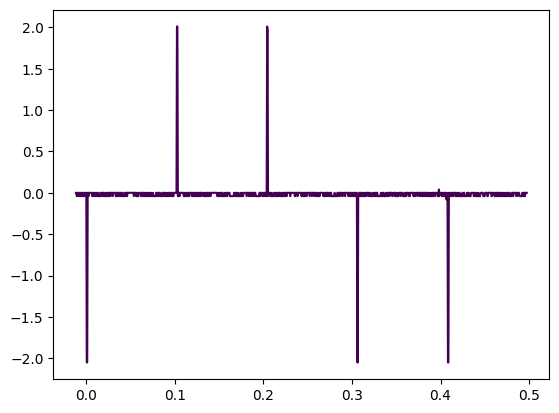

In [28]:
data2.plot('time_v', 'wfm_v')

(<Figure size 640x480 with 1 Axes>, <Axes: >)

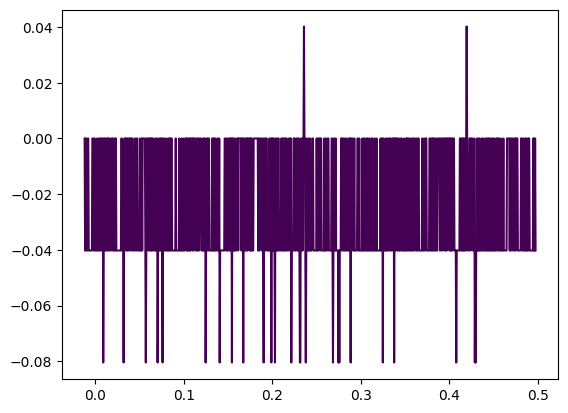

In [29]:
data2.plot('time_c', 'wfm_c')

In [34]:
wfm_v = data2['wfm_v']
wfm_c = data2['wfm_c']
time_v = data2['time_v']
time_c = data2['time_c']

In [52]:
np.argmax(wfm_v)
wfm_v[223]
len(wfm_v)

996

In [ ]:
time_v - time_c #therefore same array

In [46]:
def find_peaks_troughs_index(data_dict)->'dict':
    """
    Adds 'peaks' to the given data_dict by using scipy to find the peaks and troughs.
    modified to skip based on pulse length

    Requirements
    ------------
    wfm_v: dict key 
        The data_dict key containing the voltage wf
    Returns
    -------
    data_dict: dict
        The mutated dictionary with the peaks indexes added.

    MODIFIES: peaks"""
    arr = data_dict['wfm_v']
    arr_normalized = 2 * ((arr - np.min(arr)) / (np.max(arr) - np.min(arr))) - 1
    peaks, _ = find_peaks(arr_normalized, height=0.8, distance=50)
    troughs, _ = find_peaks(-1*arr_normalized, height=0.8, distance=50)
    all_peaks = np.concatenate((peaks, troughs), axis=0)
    data_dict['peaks'] = np.sort(all_peaks)
    return data_dict

In [61]:
bet = find_peaks_troughs_index(data2.data)
jesus = bet['peaks']
jesus

array([ 24, 223, 422, 621, 821], dtype=int64)

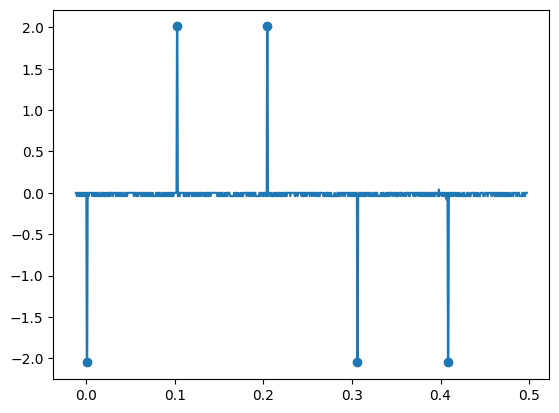

In [57]:
plt.scatter(time_v[jesus], wfm_v[jesus])
plt.plot(time_v, wfm_v)


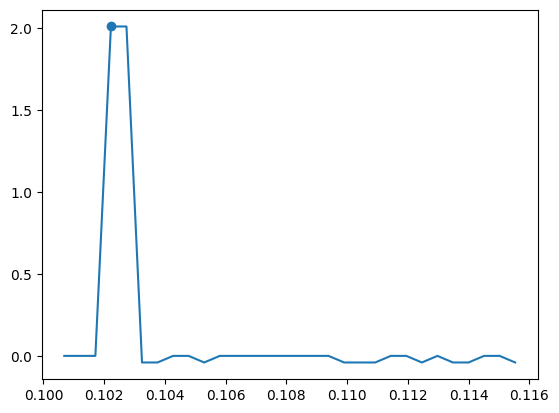

In [63]:
plt.scatter(time_v[jesus[1]], wfm_v[jesus[1]])
plt.plot(time_v[220:250], wfm_v[220:250])

Idea, to get the end of the peak, we just repeat the process with a reversed list, therefore we get the same effect, and then we just reverse it back?

In [67]:
def find_peaks_troughs_index_reverse(data_dict)->'dict':
    """
    Adds 'peaks' to the given data_dict by using scipy to find the peaks and troughs.
    modified to skip based on pulse length

    Requirements
    ------------
    wfm_v: dict key 
        The data_dict key containing the voltage wf
    Returns
    -------
    data_dict: dict
        The mutated dictionary with the peaks indexes added.

    MODIFIES: peaks"""
    arr = data_dict['wfm_v'][::-1] #reverse the list and repeat process
    arr_normalized = 2 * ((arr - np.min(arr)) / (np.max(arr) - np.min(arr))) - 1
    peaks, _ = find_peaks(arr_normalized, height=0.8, distance=50)
    troughs, _ = find_peaks(-1*arr_normalized, height=0.8, distance=50)
    all_peaks = np.concatenate((peaks, troughs), axis=0)
    data_dict['peaks_reverse'] = np.sort(all_peaks)
    return data_dict

In [69]:
bet = find_peaks_troughs_index_reverse(data2.data)
jesus2 = bet['peaks_reverse']
jesus2

array([173, 373, 573, 771, 970], dtype=int64)

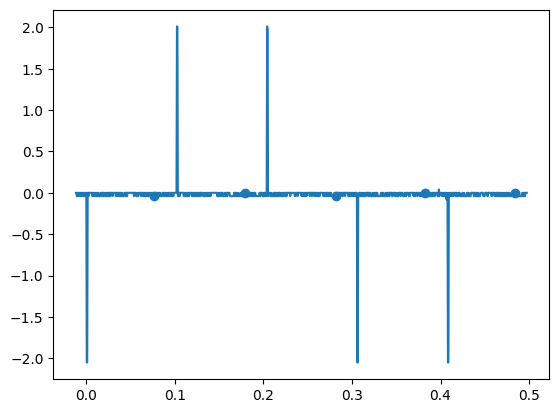

In [70]:
plt.scatter(time_v[jesus2], wfm_v[jesus2])
plt.plot(time_v, wfm_v)

In [73]:
arr = data2['wfm_v'] #reverse the list and repeat process
arr_normalized = 2 * ((arr - np.min(arr)) / (np.max(arr) - np.min(arr))) - 1
peaks, properties = find_peaks(arr_normalized, height=0.8, distance=50)


In [74]:
pulse_starts = peaks
pulse_ends = properties["right_bases"]

KeyError: 'right_bases'